In [ ]:
%pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
%cd /content/GP_try/test

/content/GP_try/test


In [10]:
import sys; sys.path.append("../")
from feature_extractor import FeatureExtractor
import torch
import numpy as np
import time
from cascade import CascadeClassifier
import cv2
import joblib


In [11]:
torch.cuda.is_available()

True

In [5]:
!mkdir ../new_data5/
!cp -r /content/drive/MyDrive/GP/GP_try/new_data5/* ../new_data5/

In [ ]:
!rm -r new_data5/

In [ ]:
!unzip ../new_data5.zip

In [ ]:
!cp -r new_data5/ ../new_data5

In [6]:
!ls ../new_data5/test/face -1 | wc -l
!ls ../new_data5/test/non-face -1 | wc -l
!ls ../new_data5/train/face -1 | wc -l
!ls ../new_data5/train/non-face -1 | wc -l

905
1810
3618
7236


In [7]:
!mkdir ../no_faces/
!cp -r /content/drive/MyDrive/SBI/SelfBlendedImages/no_faces/* ../no_faces/

In [8]:
!ls /content/drive/MyDrive/SBI/SelfBlendedImages/no_faces -1 | wc -l

1000


In [9]:
!mkdir ../hFeatures5_4

In [12]:
parent = '../hFeatures5_4/'
data_path = 'new_data5'

# Features Extraction

In [13]:
mean = 111.02404842061983
std = 56.926623499738575

In [14]:
def transform1(img):
  return img
  # img = (img - img.mean()) / (img.std() + 1e-8)
  # return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [15]:

feature_extractor = FeatureExtractor(shape=(16, 16),
                                     percentile=100,
                                     batch_size=1000,
                                     verbose=False,
                                     all_features_file=parent + "all_features.npz",
                                     selected_features_file=parent + "selected_features.npz",
                                     labels_file=parent + "labels.npy",
                                     indecies_file=parent + "indecies.npy",)

In [16]:

X, y = feature_extractor.extractFeatures(pos_path='../'+data_path+'/train/face',
                                  neg_path='../'+data_path+'/train/non-face',
                                  transform=transform1,
                                  save_to_file=False)
print('done')


done


In [9]:
import gc
gc.collect()

49

In [ ]:
# del feature_extractor.f2
# del feature_extractor.f3
# del feature_extractor.f4

In [ ]:
# indecies, X = feature_extractor.selectPercentile(X, y )
# # y = np.load(parent + 'labels.npy')
# print(X.shape, y.shape)
# print('done')


Now selecting percentile features
(12792, 10854) (10854,)
done


In [ ]:
# feature_extractor.f2, feature_extractor.f3, feature_extractor.f4 = feature_extractor.describe_features(feature_extractor.shape)

In [15]:
# temp = np.load('../hFeatures3/all_features.npz')['arr_0']
temp = X
temp

array([[ 11.,  -8., -19., ...,   9.,  -2.,  -3.],
       [-22.,   6.,  32., ...,   5.,  -2.,   3.],
       [105., -10.,  -1., ..., -25.,  30., -15.],
       ...,
       [-25.,  76., -59., ..., -13.,   8.,   8.],
       [-11.,  33., -10., ...,  -3.,   2.,   4.],
       [-15.,   1., -34., ...,   7.,   3.,  -1.]], dtype=float32)

In [16]:
print(temp.min())
print(temp.max())
print(temp[3])
print(temp[4])

-25335.0
25247.0
[-60.   7.  37. ...  20.  -1.   8.]
[279.   9. -55. ... -86.  41. -30.]


# Training

In [ ]:
!mkdir /content/drive/MyDrive/GP/GP_try/hFeatures5_4/

mkdir: cannot create directory ‘/content/drive/MyDrive/GP/GP_try/hFeatures5_4/’: File exists


In [17]:
face_detect_dict = {
    "feature_extractor":feature_extractor,
    "window_size":(16,16),
    "scale_dist":1.25,
    "max_size":500,
    "min_size":50,
    "stride":10,
    "device":torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    "normalize_subwindows":False,
    "calc_conf":False
}

In [18]:
%rm StrongClassifier/lastSC.last
s_t = time.time()
cascadeClassifier= CascadeClassifier(X,
                                     y,
                                     batchsize=5000,
                                     verbose=True,
                                     layers=[5, 10, 20, 20, 50] + [50] * 5,
                                     )
face_detect_dict['classifier'] = cascadeClassifier
s = '/content/drive/MyDrive/GP/GP_try/hFeatures5_4/'
tr_acc = cascadeClassifier.train(dirpath='StrongClassifier',
                                 lastSC='StrongClassifier/lastSC.last',
                                 more_neg_path='../no_faces',
                                 equal_weights=True,print_accuracy=True,
                                 n_per_img=20, req_cnt=6000,
                                 by_confidence=True, by_size=True,
                                 resize_factor=0.25,
                                 **face_detect_dict)

cascadeClassifier.save(parent + 'cascadeClassifier.pkl')

print('accuracy: ', tr_acc)
print('time taken: ', time.time() - s_t, 's')
print('done')

Training strong classifier 001: 100%|██████████| 5/5 [00:55<00:00, 11.13s/it]


Checkpoint 0
For layer 1 accuracy is 0.9378109452736318
Checkpoint 1
Checkpoint 2
Checkpoint 3
Checkpoint 4
Checkpoint 9
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Streaming output truncated to the last 5000 lines.
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 

Training strong classifier 002: 100%|██████████| 10/10 [00:36<00:00,  3.65s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 

Training strong classifier 003: 100%|██████████| 20/20 [01:01<00:00,  3.09s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 

Training strong classifier 004: 100%|██████████| 20/20 [01:10<00:00,  3.54s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 

Training strong classifier 005: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 

Training strong classifier 006: 100%|██████████| 50/50 [01:28<00:00,  1.76s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 

Training strong classifier 007: 100%|██████████| 50/50 [01:26<00:00,  1.73s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 

Training strong classifier 008: 100%|██████████| 50/50 [01:16<00:00,  1.54s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 27
Checkpoint 28
Checkpoint 29
Checkpoint 11
Checkpoint 12
Checkpoint 13
Checkpoint 10
Checkpoint 14
Checkpoint 15
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 

Training strong classifier 009: 100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


Streaming output truncated to the last 5000 lines.
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 16
Checkpoint 17
Checkpoint 18
Checkpoint 19
Checkpoint 20
Checkpoint 21
Checkpoint 22
Checkpoint 23
Checkpoint 24
Checkpoint 25
Checkpoint 26
Checkpoint 

Training strong classifier 010: 100%|██████████| 50/50 [01:18<00:00,  1.57s/it]


Checkpoint 0
For layer 10 accuracy is 0.7874033149171271
Checkpoint 1
Checkpoint 2
Checkpoint 8
%%%%%%% Layer 10 / 10 has remaining y=1: 3618, y=0: 907 %%%%%%%
accuracy:  0.7874033149171271
time taken:  3909.038116455078 s
done


In [ ]:
print(cascadeClassifier.X.shape)
print(cascadeClassifier.y.shape)
print(np.sum(cascadeClassifier.y==1))
print(np.sum(cascadeClassifier.y!=1))

(32384, 4659)
(4659,)
3618
1041


In [19]:
cascadeClassifier.save_joblib(parent + 'cascadeClassifier.joblib')

In [20]:
joblib.dump(feature_extractor, parent + 'feature_extractor.joblib')

['../hFeatures5_4/feature_extractor.joblib']

In [21]:
!cp -r ../hFeatures5_4/ /content/drive/MyDrive/GP/GP_try/hFeatures5_4/

In [ ]:
# import pickle as pkl
# with open(parent + 'cascadeClassifier.pkl', 'rb') as f:
#   cascadeClassifier = pkl.load(f)

# Testing

In [22]:
# accuracy imports
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [23]:
s_t = time.time()
t_f_idx_map, t_features, t_labels = feature_extractor.extractFeaturesByIndecies(pos_path='../'+data_path+'/test/face',
                                            neg_path='../'+data_path+'/test/non-face',
                                            cascadeClassifier=cascadeClassifier,
                                            transform=transform1,
                                            use_percentile=False,)
print(t_features.shape, t_labels.shape)
predictions = cascadeClassifier.predict(t_features, t_f_idx_map)
print('test accuracy: ', np.sum(predictions == t_labels) / t_labels.shape[0])
print('time taken: ', time.time() - s_t, 's')

(271, 2715) (2715,)
test accuracy:  0.9104972375690608
time taken:  0.9812257289886475 s


In [24]:
# report
print('accuracy: ', accuracy_score(t_labels, predictions))
print('f1 score macro: ', f1_score(t_labels, predictions, average='macro'))
print('f1 score binary: ', f1_score(t_labels, predictions))
print('f1 score micro: ', f1_score(t_labels, predictions, average='micro'))
print('precision: ', precision_score(t_labels, predictions))
print('recall: ', recall_score(t_labels, predictions))
print('confusion matrix: \n', confusion_matrix(t_labels, predictions))
print('classification report: \n', classification_report(t_labels, predictions, digits=4))


accuracy:  0.9104972375690608
f1 score macro:  0.8910936100228644
f1 score binary:  0.8451242829827916
f1 score micro:  0.9104972375690608
precision:  0.9984939759036144
recall:  0.7325966850828729
confusion matrix: 
 [[1809    1]
 [ 242  663]]
classification report: 
               precision    recall  f1-score   support

           0     0.8820    0.9994    0.9371      1810
           1     0.9985    0.7326    0.8451       905

    accuracy                         0.9105      2715
   macro avg     0.9403    0.8660    0.8911      2715
weighted avg     0.9208    0.9105    0.9064      2715



# Try full image

In [ ]:
# !mkdir /content/drive/MyDrive/GP/GP_try/hFeatures8
# !cp -r ../hFeatures8/* /content/drive/MyDrive/GP/GP_try/hFeatures8

mkdir: cannot create directory ‘/content/drive/MyDrive/GP/GP_try/hFeatures5_3’: File exists


In [ ]:
!mkdir ../../lfw_all
!cp /content/drive/MyDrive/GP/lfw_all/* ../../lfw_all/

In [25]:
!mkdir ../../ff_all
!cp /content/drive/MyDrive/SBI/SelfBlendedImages/full_frames/* ../../ff_all/

In [17]:
import random
# from detect_face import FaceDetector
from PIL import Image
import os
import matplotlib.pyplot as plt
dset_path = '../../ff_all/'
# dset_path = '../../lfw_all/'
all_images_names = os.listdir(dset_path)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
all_images_names = [dset_path + name for name in all_images_names]
all_images_names[0]

'../../ff_all/404..png'

In [18]:
show_images = list(range(0, 20))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
feature_extractor.verbose = False

In [3]:
from copy import deepcopy

In [2]:
import joblib

In [11]:
cascadeClassifier2 = joblib.load('../hFeatures5_4/cascadeClassifier.joblib')
feature_extractor2 = joblib.load('../hFeatures5_4/feature_extractor.joblib')

In [37]:
from importlib import reload
import detect_face
reload(detect_face)
from detect_face import MinFaceDetector

In [14]:
from detect_face import MinFaceDetector
faceDetector = MinFaceDetector(cascadeClassifier2, \
                            feature_extractor2,\

                            window_size=(16, 16),\
                            scale_dist=1.25,
                            max_size=500,
                            stride=10,

                            device=device,
                            use_percentile=False,
                            # makeθ0=False,

                            # verbose=False,
                            normalize_subwindows=False,
                            calc_conf=True,
                            # report_time=True,
                            # use_sklearn=False
                            )

In [16]:
joblib.dump(faceDetector, '/content/drive/MyDrive/GP/GP_try/hFeatures5_4/faceDetector.joblib')

['/content/drive/MyDrive/GP/GP_try/hFeatures5_4/faceDetector.joblib']

In [21]:
import cv2
import numpy as np

RGB
(480, 640, 3)
(120, 160)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'Getting Subwindows': 0.08422350883483887, 'Resizing Subwindows': 0.011532068252563477, 'Normalize': 6.67572021484375e-06, 'Extracting Features': 5.042645692825317, 'Classifying': 0.007803201675415039, 'total': 0.04431891441345215}


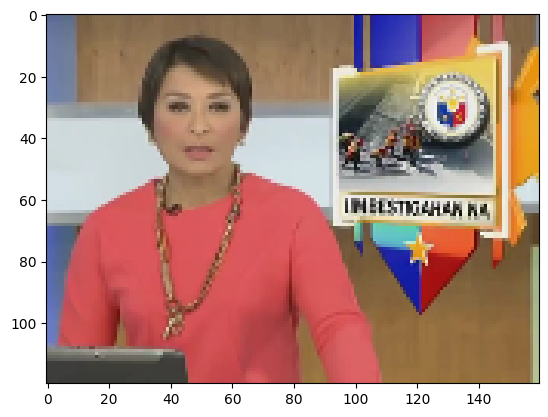

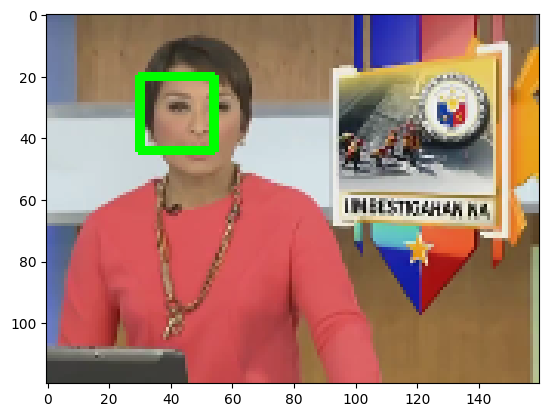

RGB
(480, 656, 3)
(120, 164)
{'Getting Subwindows': 0.002975940704345703, 'Resizing Subwindows': 0.0044023990631103516, 'Normalize': 5.0067901611328125e-06, 'Extracting Features': 0.17999863624572754, 'Classifying': 0.013117074966430664, 'total': 0.03335070610046387}


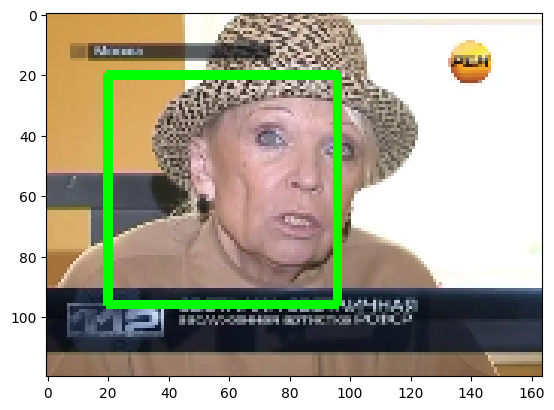

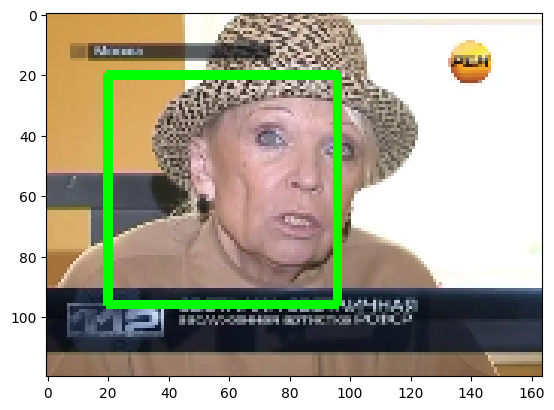

RGB
(480, 600, 3)
(120, 150)
{'Getting Subwindows': 0.0033991336822509766, 'Resizing Subwindows': 0.004235982894897461, 'Normalize': 5.7220458984375e-06, 'Extracting Features': 0.029787063598632812, 'Classifying': 0.011834144592285156, 'total': 0.033785343170166016}


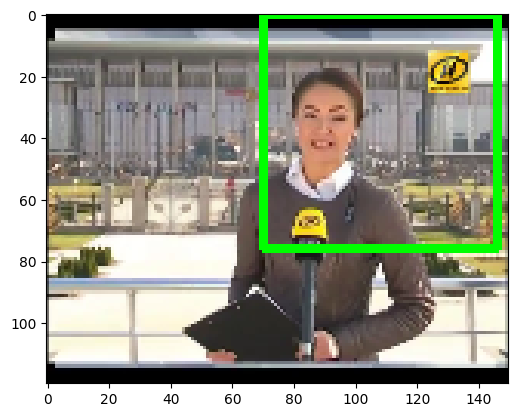

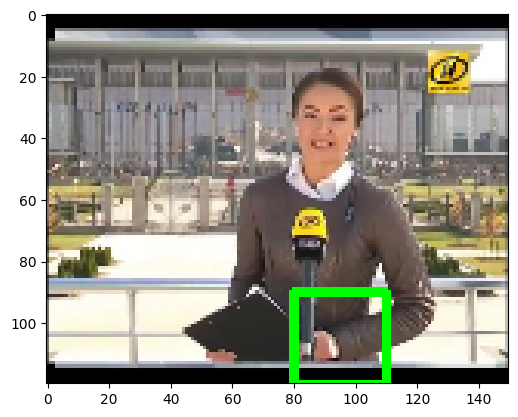

RGB
(480, 640, 3)
(120, 160)
{'Getting Subwindows': 0.0035247802734375, 'Resizing Subwindows': 0.004291534423828125, 'Normalize': 4.76837158203125e-06, 'Extracting Features': 0.02920365333557129, 'Classifying': 0.0040798187255859375, 'total': 0.039307594299316406}


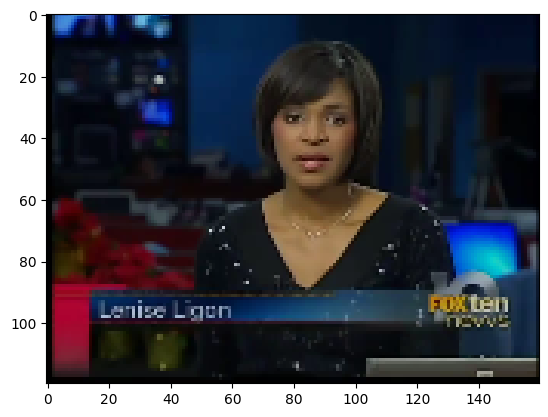

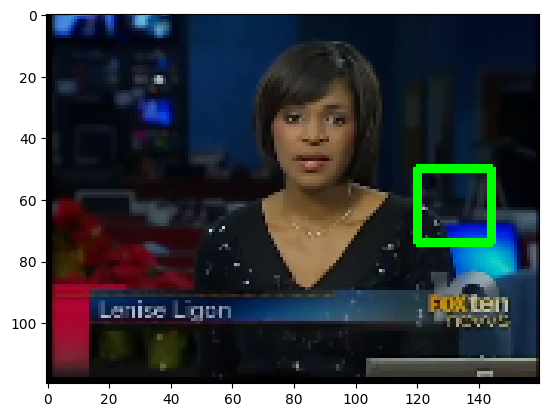

RGB
(720, 1280, 3)
(180, 320)
{'Getting Subwindows': 0.007700920104980469, 'Resizing Subwindows': 0.014612197875976562, 'Normalize': 1.0728836059570312e-05, 'Extracting Features': 0.03849172592163086, 'Classifying': 0.022953033447265625, 'total': 0.04660630226135254}


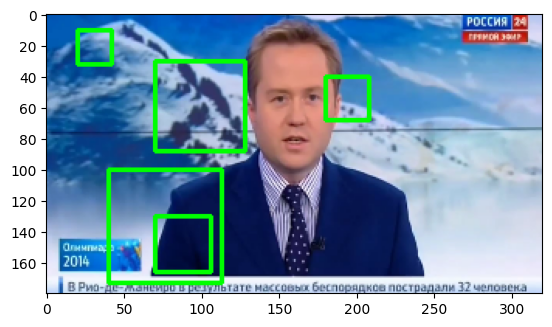

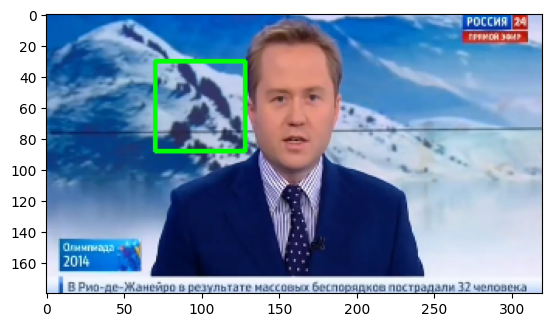

RGB
(1080, 1920, 3)
(270, 480)
{'Getting Subwindows': 0.07154417037963867, 'Resizing Subwindows': 0.053075551986694336, 'Normalize': 1.430511474609375e-05, 'Extracting Features': 0.06232023239135742, 'Classifying': 0.02448439598083496, 'total': 0.07244300842285156}


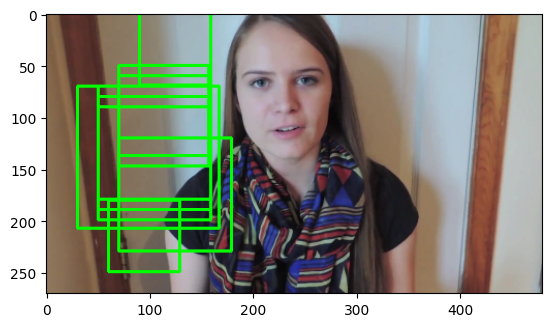

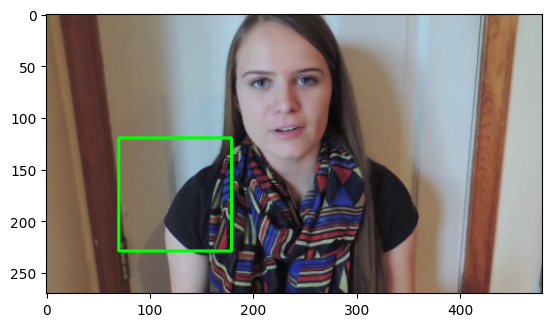

RGB
(1080, 1920, 3)
(270, 480)
{'Getting Subwindows': 0.05673813819885254, 'Resizing Subwindows': 0.05558657646179199, 'Normalize': 1.3828277587890625e-05, 'Extracting Features': 0.06592416763305664, 'Classifying': 0.034960031509399414, 'total': 0.07334113121032715}


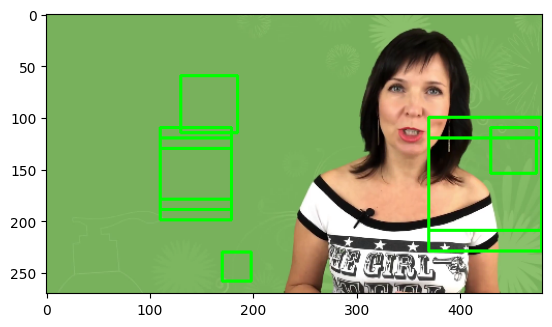

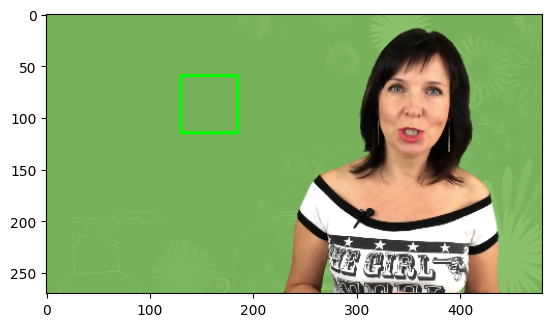

RGB
(480, 854, 3)
(120, 213)
{'Getting Subwindows': 0.0033445358276367188, 'Resizing Subwindows': 0.006811618804931641, 'Normalize': 1.0967254638671875e-05, 'Extracting Features': 0.034270286560058594, 'Classifying': 0.023543357849121094, 'total': 0.04398012161254883}


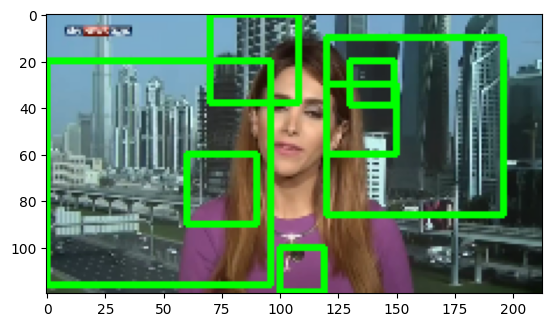

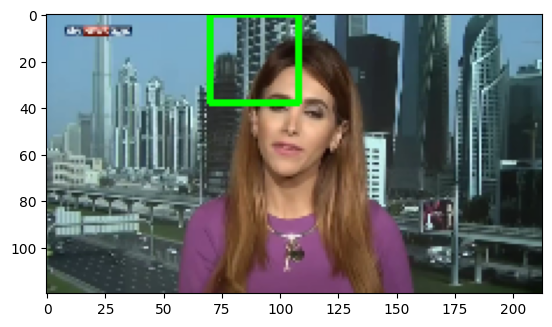

RGB
(480, 640, 3)
(120, 160)
{'Getting Subwindows': 0.0036933422088623047, 'Resizing Subwindows': 0.0054285526275634766, 'Normalize': 7.867813110351562e-06, 'Extracting Features': 0.0397183895111084, 'Classifying': 0.008192777633666992, 'total': 0.04175424575805664}


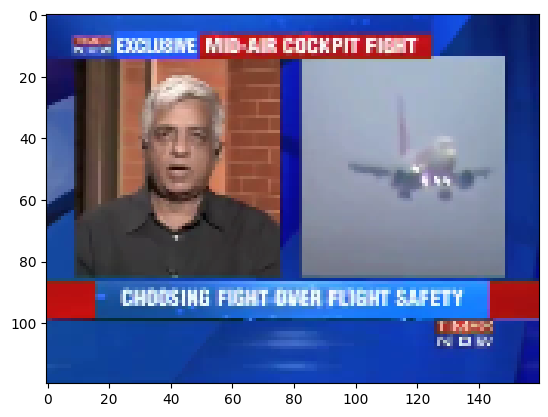

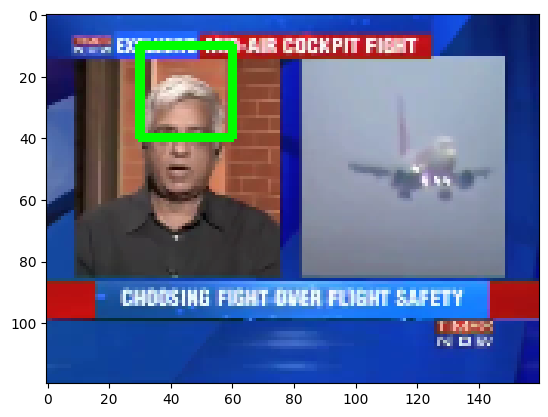

RGB
(480, 656, 3)
(120, 164)
{'Getting Subwindows': 0.0026237964630126953, 'Resizing Subwindows': 0.004708051681518555, 'Normalize': 5.9604644775390625e-06, 'Extracting Features': 0.03392148017883301, 'Classifying': 0.013313531875610352, 'total': 0.041718244552612305}


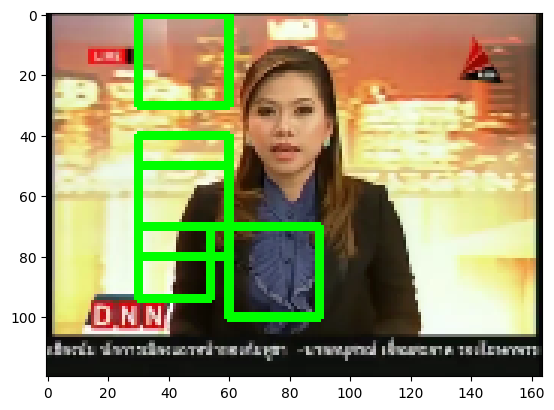

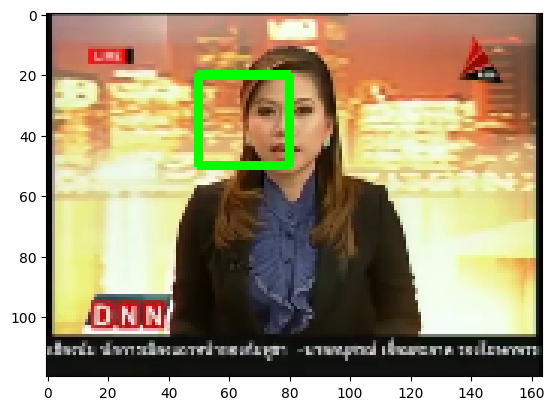

RGB
(1080, 1920, 3)
(270, 480)
{'Getting Subwindows': 0.056635379791259766, 'Resizing Subwindows': 0.0706796646118164, 'Normalize': 1.4543533325195312e-05, 'Extracting Features': 0.07964730262756348, 'Classifying': 0.059952735900878906, 'total': 0.0964651107788086}


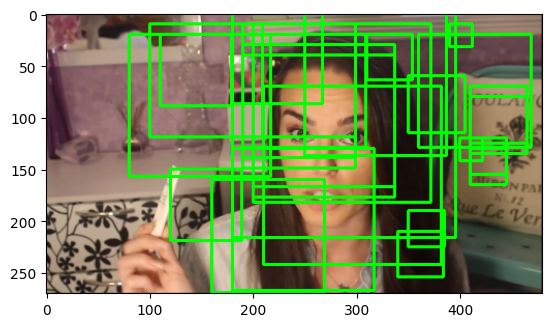

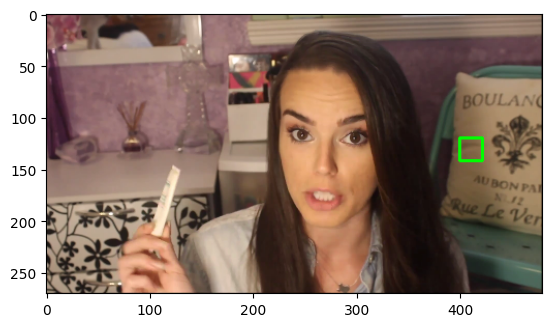

RGB
(480, 640, 3)
(120, 160)
{'Getting Subwindows': 0.002841472625732422, 'Resizing Subwindows': 0.005192279815673828, 'Normalize': 6.4373016357421875e-06, 'Extracting Features': 0.037081241607666016, 'Classifying': 0.010152578353881836, 'total': 0.0500035285949707}


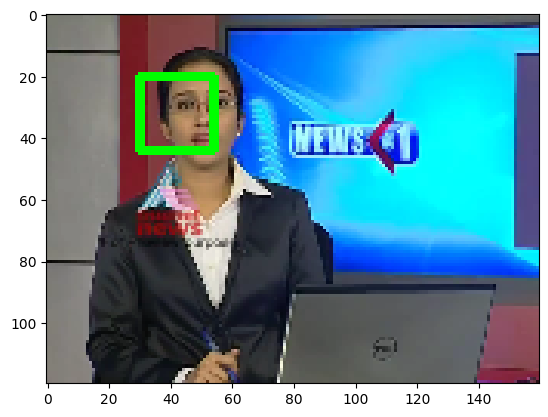

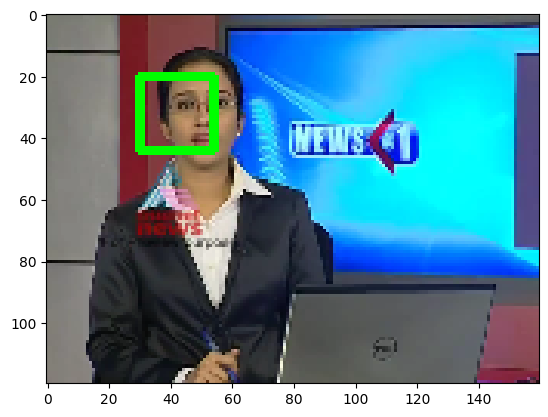

RGB
(720, 1280, 3)
(180, 320)
{'Getting Subwindows': 0.007828950881958008, 'Resizing Subwindows': 0.016904115676879883, 'Normalize': 1.0728836059570312e-05, 'Extracting Features': 0.04700160026550293, 'Classifying': 0.024399757385253906, 'total': 0.05609893798828125}


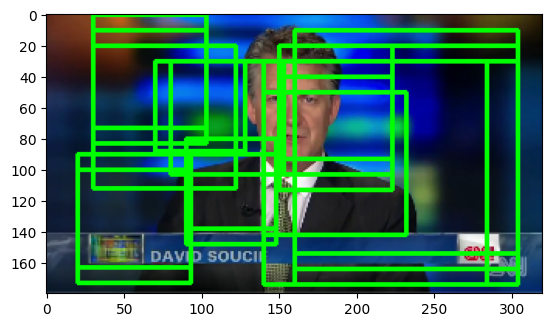

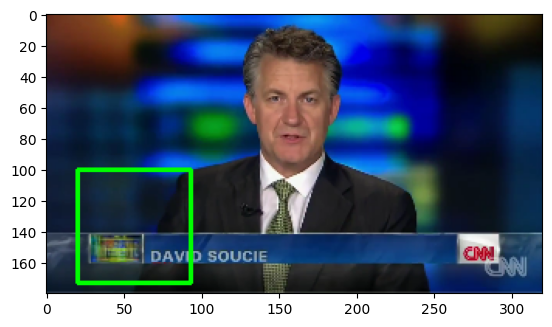

RGB
(1080, 1920, 3)
(270, 480)
{'Getting Subwindows': 0.0533754825592041, 'Resizing Subwindows': 0.056713104248046875, 'Normalize': 1.430511474609375e-05, 'Extracting Features': 0.07318401336669922, 'Classifying': 0.033162593841552734, 'total': 0.07477688789367676}


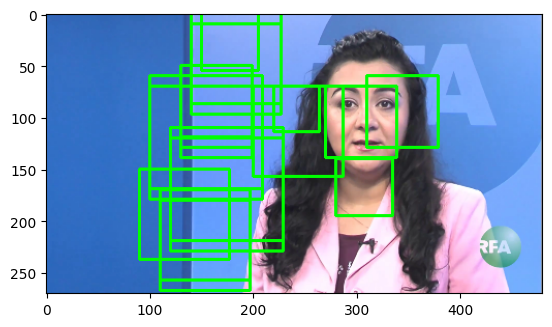

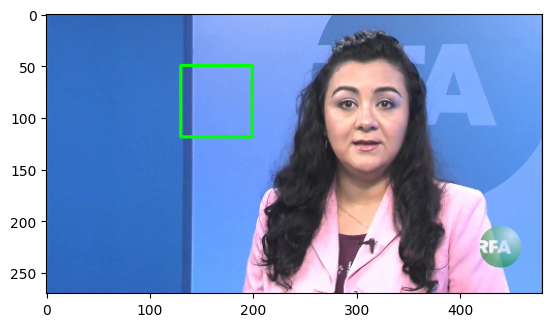

RGB
(480, 654, 3)
(120, 163)
{'Getting Subwindows': 0.002796649932861328, 'Resizing Subwindows': 0.004973888397216797, 'Normalize': 9.775161743164062e-06, 'Extracting Features': 0.036048173904418945, 'Classifying': 0.01645064353942871, 'total': 0.049478769302368164}


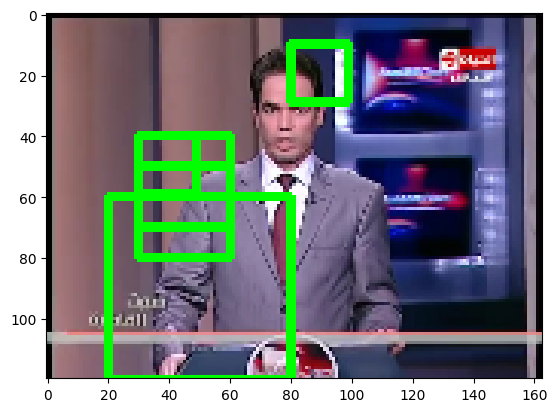

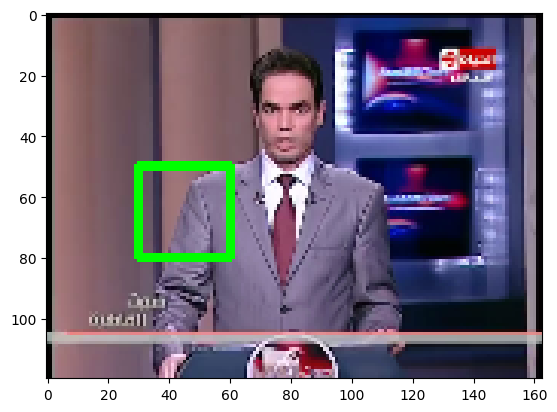

RGB
(720, 1280, 3)
(180, 320)
{'Getting Subwindows': 0.0068438053131103516, 'Resizing Subwindows': 0.016524553298950195, 'Normalize': 9.775161743164062e-06, 'Extracting Features': 0.050575971603393555, 'Classifying': 0.02420520782470703, 'total': 0.05299258232116699}


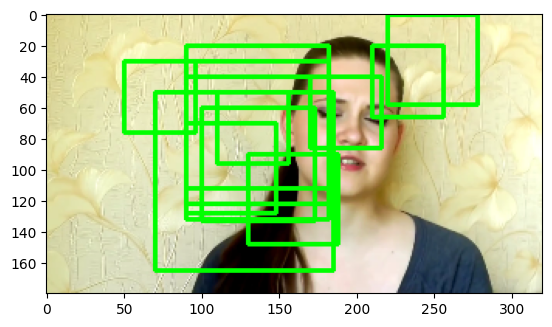

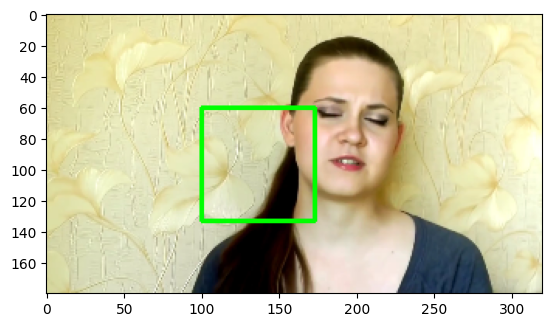

RGB
(720, 1280, 3)
(180, 320)
{'Getting Subwindows': 0.007664680480957031, 'Resizing Subwindows': 0.024030208587646484, 'Normalize': 1.0728836059570312e-05, 'Extracting Features': 0.05976557731628418, 'Classifying': 0.031084299087524414, 'total': 0.08268618583679199}


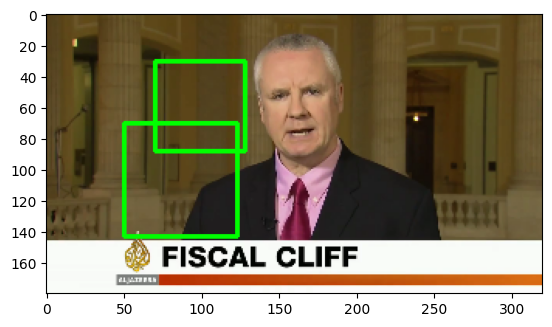

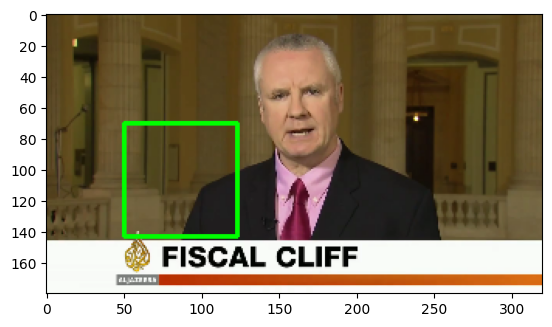

RGB
(480, 656, 3)
(120, 164)
{'Getting Subwindows': 0.003265857696533203, 'Resizing Subwindows': 0.011270999908447266, 'Normalize': 7.867813110351562e-06, 'Extracting Features': 0.04925656318664551, 'Classifying': 0.025952816009521484, 'total': 0.07196807861328125}


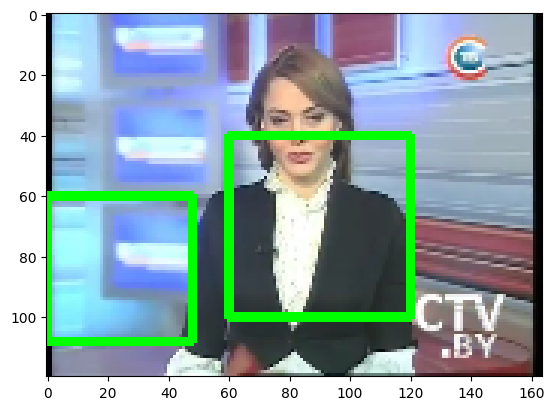

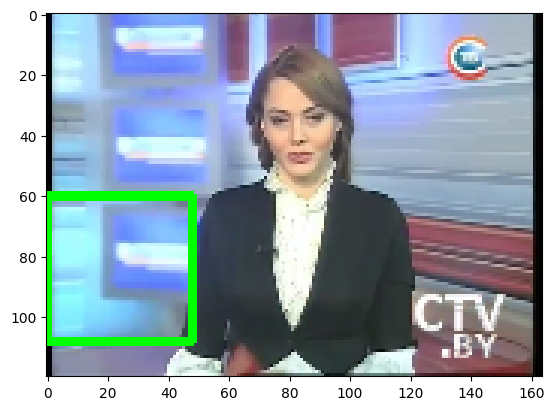

RGB
(720, 1280, 3)
(180, 320)
{'Getting Subwindows': 0.011993408203125, 'Resizing Subwindows': 0.02364349365234375, 'Normalize': 1.2636184692382812e-05, 'Extracting Features': 0.07861113548278809, 'Classifying': 0.030127286911010742, 'total': 0.08586454391479492}


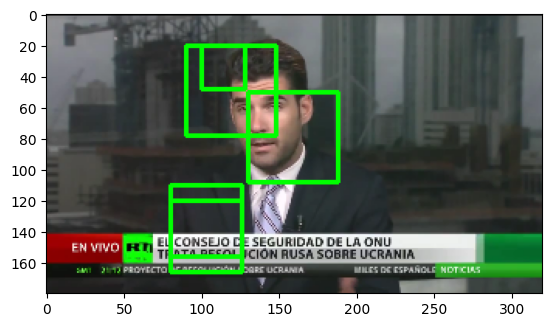

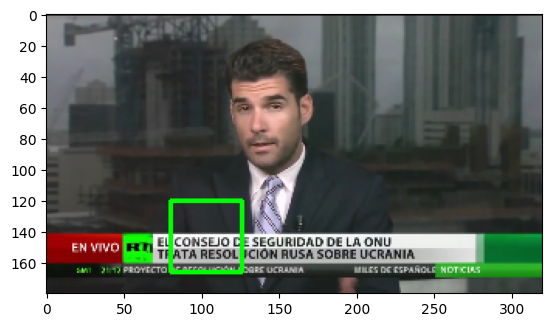

RGB
(1080, 1920, 3)
(270, 480)
{'Getting Subwindows': 0.06502532958984375, 'Resizing Subwindows': 0.08385324478149414, 'Normalize': 1.5497207641601562e-05, 'Extracting Features': 0.08711481094360352, 'Classifying': 0.06958889961242676, 'total': 0.11497688293457031}


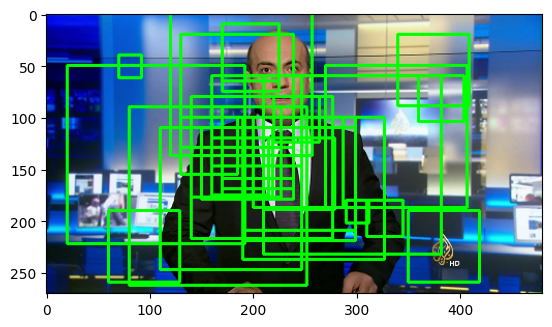

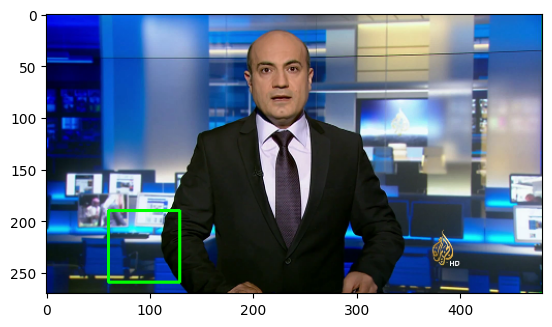

In [24]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  print(img.shape)
  img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=\
                  faceDetector.find_face(img2)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  # for face_coordinate in face_coordinates:
  for x1, y1, x2, y2 in face_coordinates:
      cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()



In [ ]:
tmpX = faceDetector.classifier.X
faceDetector.classifier.X = None
joblib.dump(faceDetector, parent + 'faceDetector.joblib')
faceDetector.classifier.X = tmpX